In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv("Ficherodedatos(MO)17-1-2023.csv")
data.shape

(208, 52)

In [3]:
data.head()

,Edad,EdadG,EdadG2,Sexo,Color de piel,Diag.Ing1,Diag.Ing2,Diag.Ing3,Diag.Ing4,Reingreso,...,TiempoVAMG,TiempoVAMG2,F.IngHosp,F.IngUTI,F.EgrUTI,F.EgrHosp,Est. PreUCI,Est. UCI,Est. PostUCI,Est. Hosp
0,35.0,1,1,Femenino,Blanca,1,0,0,0,0,...,1,1,2014-04-20,2014-04-20,2014-04-24,2014-04-24,0,4,0,4
1,87.0,4,2,Femenino,Mestizo,2,0,0,0,0,...,1,1,2014-05-14,2014-05-14,2014-06-07,2014-06-07,0,24,0,24
2,70.0,3,2,Femenino,Blanca,4,0,0,0,0,...,1,1,2014-05-27,2014-06-03,2014-06-06,2014-06-10,7,3,4,14
3,24.0,1,1,Masculino,Blanca,13,0,0,0,0,...,1,1,2014-06-03,2014-06-03,2014-06-16,2014-06-16,0,13,0,13
4,24.0,1,1,Femenino,Blanca,3,0,0,0,0,...,1,1,2014-05-14,2014-05-14,2014-05-19,2014-05-23,0,5,4,9


In [4]:
data.tail()

,Edad,EdadG,EdadG2,Sexo,Color de piel,Diag.Ing1,Diag.Ing2,Diag.Ing3,Diag.Ing4,Reingreso,...,TiempoVAMG,TiempoVAMG2,F.IngHosp,F.IngUTI,F.EgrUTI,F.EgrHosp,Est. PreUCI,Est. UCI,Est. PostUCI,Est. Hosp
203,64.0,3,2,Masculino,Blanca,3,17,0,0,0,...,3,2,2015-09-11,2015-09-11,2015-09-25,2015-10-10,0,14,15,29
204,43.0,2,1,Masculino,Blanca,3,27,0,0,0,...,3,2,2015-10-16,2015-10-16,2015-11-01,2015-12-27,0,16,56,72
205,23.0,1,1,Masculino,Blanca,3,7,16,0,0,...,3,2,2015-10-25,2015-10-25,2015-11-09,2015-12-02,0,15,23,38
206,25.0,1,1,Masculino,Mestizo,15,20,0,0,0,...,3,2,2015-12-18,2015-12-18,2016-01-01,2016-01-03,0,14,2,16
207,55.0,2,1,Femenino,Blanca,40,0,0,0,0,...,4,2,2015-06-17,2015-06-17,2015-12-29,2016-02-03,0,195,36,231


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Edad           208 non-null    float64
 1   EdadG          208 non-null    int64  
 2   EdadG2         208 non-null    int64  
 3   Sexo           208 non-null    object 
 4   Color de piel  208 non-null    object 
 5   Diag.Ing1      208 non-null    int64  
 6   Diag.Ing2      208 non-null    int64  
 7   Diag.Ing3      208 non-null    int64  
 8   Diag.Ing4      208 non-null    int64  
 9   Reingreso      208 non-null    int64  
 10  APACHE         208 non-null    float64
 11  APACHEG        208 non-null    int64  
 12  APACHEG2       208 non-null    int64  
 13  InsufResp      208 non-null    int64  
 14  InsufRespG     207 non-null    float64
 15  InsufRespG2    208 non-null    int64  
 16  VA             208 non-null    int64  
 17  VAG            208 non-null    int64  
 18  Destino   

In [6]:
columns_irrelevant = ['EdadG','Color de piel','EdadG2','Sexo',
                      'Reingreso','APACHEG','APACHEG2','InsufRespG','InsufRespG2',
                      'Destino','DestinoG','LET','Est. Hosp',
                      'CD.CDM','CD.CIM1','CD.CIM2','CD.CBM','N.CDM','N.CIM1','N.CIM2','N.CBM','LugarMuerte',
                      'LugarMuerteG','EstadUTI','DíasUTI','EstadiaUTIG','EstadiaUTIG2','TiempoVAMG','TiempoVAMG2',
                      'F.IngHosp','F.IngUTI','F.EgrUTI','F.EgrHosp','Est. UCI']
data_simulacion = data.drop(columns_irrelevant, axis=1)
data_simulacion = data_simulacion[data_simulacion['Est. PostUCI'] < 80]
data_simulacion['Est. PostUCI'] = data_simulacion['Est. PostUCI']*24
data_simulacion['Est. PreUCI'] = data_simulacion['Est. PreUCI']*24

In [7]:
VA_cat = pd.Series(data_simulacion['VA']).map({1:"Tubo endotraqueal", 2:"Traqueostomía", 3:"Ambas"})
VAG_cat = pd.Series(data_simulacion['VAG']).map({1:"Sin Traqueostomía", 2:"Con Traqueostomía"})
evolucion_cat = pd.Series(data_simulacion['Evolución']).map({0:"No Fallece", 1:"Fallece"})
insuf_resp_cat = pd.Series(data_simulacion['InsufResp']).map({1:"Neumonía", 2:"Estatus asmático", 3:"EPOC", 4:"ARDS", 5:"Otras",
                                                              6:"TCE", 7:"SPO", 8:"Afecciones no traumáticas del SNC", 9:"Causas extrapulmonares"})
diag_ing_cat = pd.Series(data_simulacion['Diag.Ing1']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_egr_cat = pd.Series(data_simulacion['Diag.Egr1']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_ing_cat = pd.Series(data_simulacion['Diag.Ing2']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_egr_cat = pd.Series(data_simulacion['Diag.Egr2']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_ing_cat = pd.Series(data_simulacion['Diag.Ing3']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_egr_cat = pd.Series(data_simulacion['Diag.Egr3']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_ing_cat = pd.Series(data_simulacion['Diag.Ing4']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})
diag_egr_cat = pd.Series(data_simulacion['Diag.Egr4']).map({0: "Vacío",1: "Intoxicación exógena",2: "Coma",3: "Trauma craneoencefálico severo",
                                                            4: "SPO de toracotomía", 5: "SPO de laparotomía", 6: "SPO de amputación",7: 'SPO de neurología',
                                                            8: 'PCR recuperado',9: 'Encefalopatía metabólica',10: 'Encefalopatía hipóxica',11: 'Ahorcamiento incompleto',
                                                            12: 'Insuficiencia cardiaca descompensada',13: 'Obstétrica grave',14: 'EPOC descompensada',15: 'ARDS',
                                                            16: 'BNB-EH',17: 'BNB-IH',18: 'BNV',19: 'Miocarditis',20: 'Leptospirosis',21: 'Sepsis grave',
                                                            22: 'DMO',23: 'Shock séptico',24: 'Shock hipovolémico',25: 'Shock cardiogénico',26: 'IMA',
                                                            27: 'Politraumatizado',28: 'Crisis miasténica',29: 'Emergencia hipertensiva',30: 'Status asmático',
                                                            31: 'Status epileptico',32: 'Pancreatitis',33: 'Embolismo graso',34: 'Accidente cerebrovascular',
                                                            35: 'Sindrome de apnea del sueño',36: 'Sangramiento digestivo',37: 'Insuficiencia renal crónica',
                                                            38: 'Insuficiencia renal aguda',39: 'Trasplante renal',40: 'Guillain Barré'})

In [8]:
data_simulacion['Diag.Egr1'] = data_simulacion['Diag.Egr1'].astype('category')
data_simulacion['Diag.Egr2'] = data_simulacion['Diag.Egr2'].astype('category')
data_simulacion['Diag.Egr3'] = data_simulacion['Diag.Egr3'].astype('category')
data_simulacion['Diag.Egr4'] = data_simulacion['Diag.Egr4'].astype('category')
data_simulacion['VA'] = data_simulacion['VA'].astype('category')
data_simulacion['Diag.Ing1'] = data_simulacion['Diag.Ing1'].astype('category')
data_simulacion['Diag.Ing2'] = data_simulacion['Diag.Ing2'].astype('category')
data_simulacion['Diag.Ing3'] = data_simulacion['Diag.Ing3'].astype('category')
data_simulacion['Diag.Ing4'] = data_simulacion['Diag.Ing4'].astype('category')
data_simulacion['VAG'] = data_simulacion['VAG'].astype('category')
data_simulacion['Evolución'] = data_simulacion['Evolución'].astype('category')
data_simulacion['InsufResp'] = data_simulacion['InsufResp'].astype('category')
data_simulacion['Edad'] = data_simulacion['Edad'].astype('int64')
data_simulacion['EstadiaUTI'] = data_simulacion['EstadiaUTI'].astype('int64')
data_simulacion['TiempoVAM'] = data_simulacion['TiempoVAM'].astype('int64')
data_simulacion['APACHE'] = data_simulacion['APACHE'].astype('int64')

data_simulacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 207
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Edad          206 non-null    int64   
 1   Diag.Ing1     206 non-null    category
 2   Diag.Ing2     206 non-null    category
 3   Diag.Ing3     206 non-null    category
 4   Diag.Ing4     206 non-null    category
 5   APACHE        206 non-null    int64   
 6   InsufResp     206 non-null    category
 7   VA            206 non-null    category
 8   VAG           206 non-null    category
 9   Diag.Egr1     206 non-null    category
 10  Diag.Egr2     206 non-null    category
 11  Diag.Egr3     205 non-null    category
 12  Diag.Egr4     206 non-null    category
 13  Evolución     206 non-null    category
 14  EstadiaUTI    206 non-null    int64   
 15  TiempoVAM     206 non-null    int64   
 16  Est. PreUCI   206 non-null    int64   
 17  Est. PostUCI  206 non-null    int64   
dtypes: categor

In [9]:
data_simulacion.describe()

,Edad,APACHE,EstadiaUTI,TiempoVAM,Est. PreUCI,Est. PostUCI
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,54.276699,13.694175,280.330097,139.810680,53.475728,289.864078
std,18.937539,6.372859,376.375484,258.232658,119.027592,343.430415
min,17.000000,2.000000,48.000000,2.000000,0.000000,0.000000
25%,42.000000,9.000000,120.000000,48.000000,0.000000,72.000000
50%,56.000000,13.000000,192.000000,72.000000,0.000000,168.000000
75%,68.000000,18.000000,336.000000,168.000000,48.000000,336.000000
max,91.000000,36.000000,4680.000000,3456.000000,816.000000,1752.000000


C:\Users\Isael\AppData\Local\Temp\ipykernel_15000\1779919188.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_simulacion.corr(), annot=True)


<Axes: >

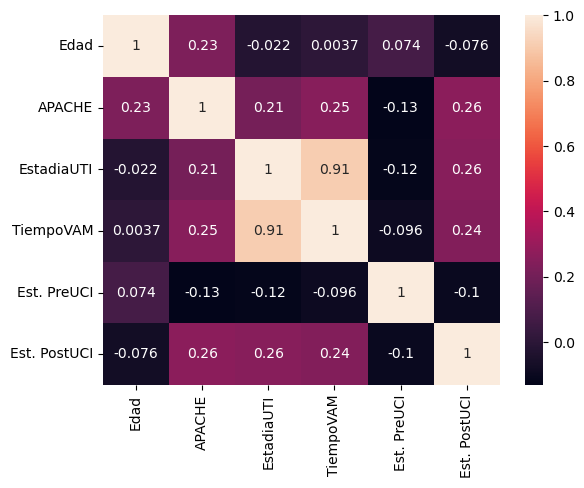

In [10]:
sns.heatmap(data_simulacion.corr(), annot=True)

In [11]:
data_cross_tab = data_simulacion[['Diag.Ing1','Diag.Ing2','Diag.Ing3','Diag.Ing4','InsufResp','VA','VAG','Diag.Egr1','Diag.Egr2','Diag.Egr3','Diag.Egr4','Evolución']]
cross_tab = pd.crosstab(data_simulacion['Diag.Ing1'],data_simulacion['InsufResp'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

1309.0064430692287
1.5385905711355787e-146


In [12]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing2'],data_simulacion['InsufResp'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

553.9608967714214
8.103760300912287e-37


In [13]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing3'],data_simulacion['InsufResp'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

89.63416901017374
0.9408545680553516


In [14]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing4'],data_simulacion['InsufResp'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

7.342116013071896
0.9660897125371783


In [15]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing1'],data_simulacion['Diag.Egr1'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

5542.2083923701575
0.0


In [16]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing2'],data_simulacion['Diag.Egr2'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

3342.8061480478054
0.0


In [17]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing3'],data_simulacion['Diag.Egr3'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

1950.0719159176772
1.3637594228062825e-272


In [18]:
cross_tab = pd.crosstab(data_simulacion['Diag.Ing4'],data_simulacion['Diag.Egr4'])
chi2,p,_,_ = chi2_contingency(cross_tab)
print(chi2)
print(p)

219.7766106442577
2.640720298684565e-40


<Axes: xlabel='Est. PostUCI', ylabel='Count'>

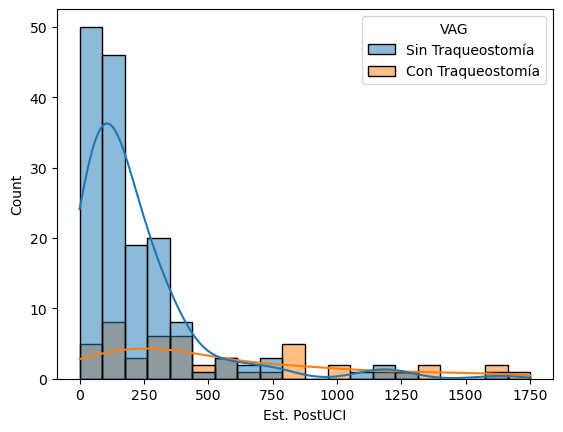

In [19]:
sns.histplot(data=data_simulacion, x='Est. PostUCI', hue=VAG_cat,kde=True)

<Axes: xlabel='Est. PostUCI', ylabel='Count'>

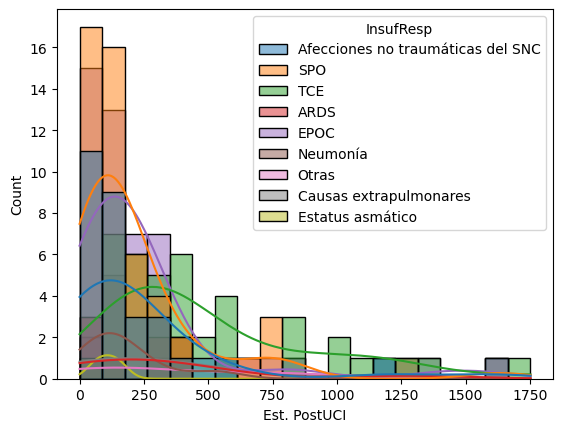

In [20]:
sns.histplot(data=data_simulacion, x='Est. PostUCI', hue=insuf_resp_cat,kde=True)

<Axes: xlabel='Est. PostUCI', ylabel='VAG'>

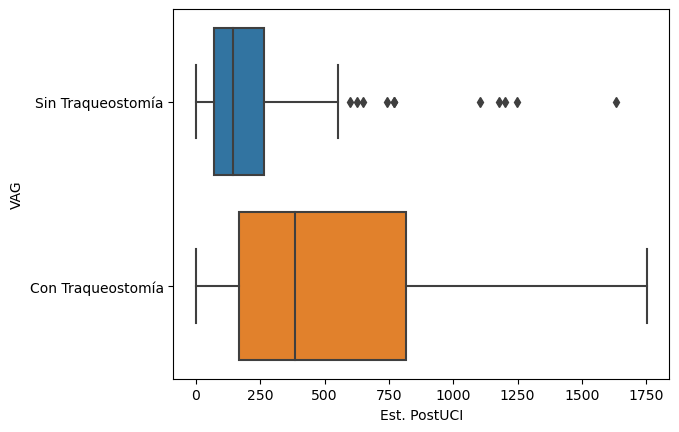

In [21]:
sns.boxplot(x='Est. PostUCI',y=VAG_cat, data=data_simulacion)

<Axes: xlabel='Est. PostUCI', ylabel='InsufResp'>

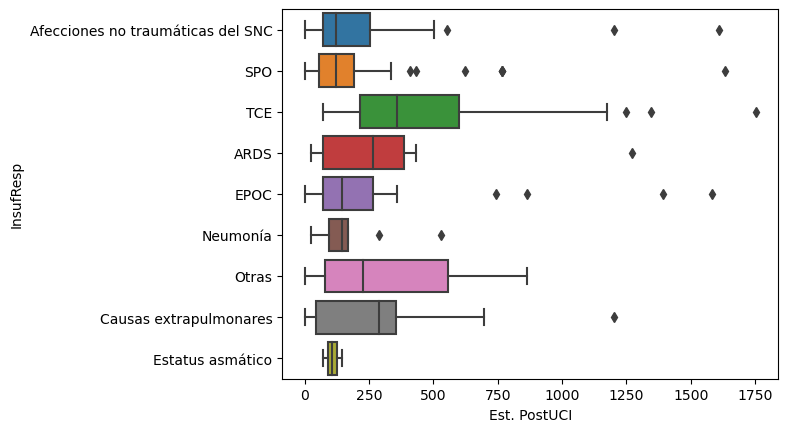

In [22]:
sns.boxplot(x='Est. PostUCI',y=insuf_resp_cat, data=data_simulacion)

<Axes: xlabel='TiempoVAM', ylabel='Est. PostUCI'>

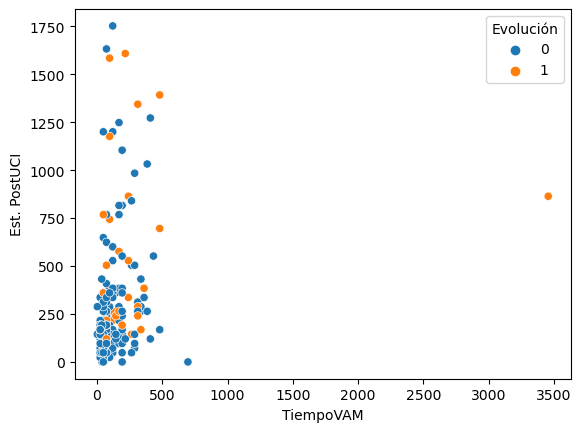

In [23]:
sns.scatterplot(data=data_simulacion,x='TiempoVAM', y='Est. PostUCI', hue='Evolución')

<Axes: xlabel='VAG', ylabel='Est. PostUCI'>

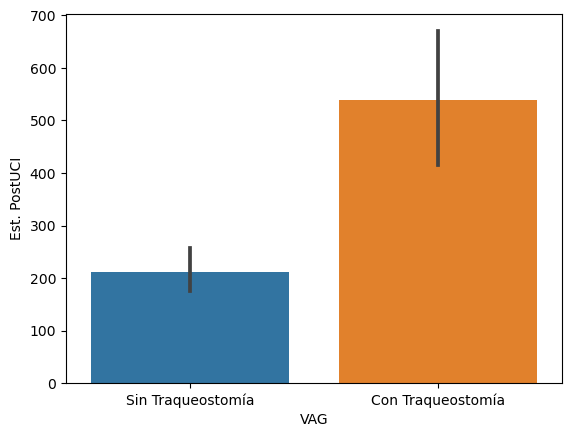

In [24]:
sns.barplot(x=VAG_cat, y="Est. PostUCI", data=data_simulacion)

<Axes: xlabel='Est. PostUCI', ylabel='InsufResp'>

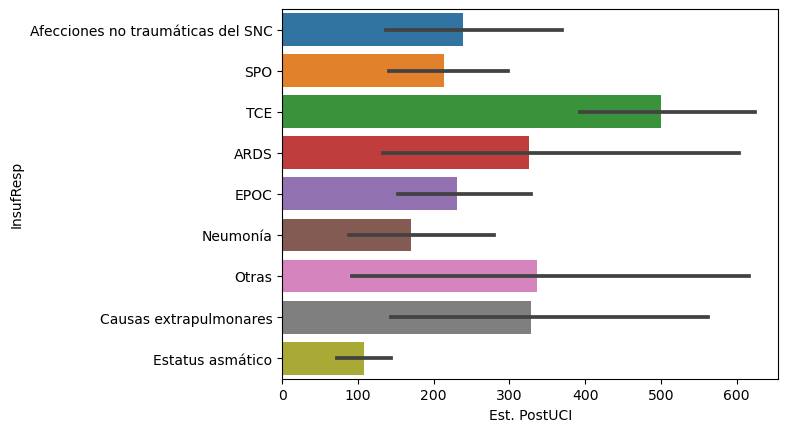

In [25]:
sns.barplot(x="Est. PostUCI", y=insuf_resp_cat, data=data_simulacion)

In [26]:
missing_values = data_simulacion.isnull().sum()
print(missing_values)

Edad            0
Diag.Ing1       0
Diag.Ing2       0
Diag.Ing3       0
Diag.Ing4       0
APACHE          0
InsufResp       0
VA              0
VAG             0
Diag.Egr1       0
Diag.Egr2       0
Diag.Egr3       1
Diag.Egr4       0
Evolución       0
EstadiaUTI      0
TiempoVAM       0
Est. PreUCI     0
Est. PostUCI    0
dtype: int64


In [27]:
data_simulacion['Diag.Egr3'] = data_simulacion['Diag.Egr3'].fillna(0)

In [28]:
columna_evolucion = data_simulacion.pop('Evolución')
columna_est_postuci = data_simulacion.pop('Est. PostUCI')
columna_diag_egr1 = data_simulacion.pop('Diag.Egr1')
columna_diag_egr2 = data_simulacion.pop('Diag.Egr2')
columna_diag_egr3 = data_simulacion.pop('Diag.Egr3')
columna_diag_egr4 = data_simulacion.pop('Diag.Egr4')

In [29]:
data_simulacion['Evolución'] = columna_evolucion
data_simulacion['Est. PostUCI'] = columna_est_postuci
data_simulacion['Diag.Egr1'] = columna_diag_egr1
data_simulacion['Diag.Egr2'] = columna_diag_egr2
data_simulacion['Diag.Egr3'] = columna_diag_egr3
data_simulacion['Diag.Egr4'] = columna_diag_egr4
data_simulacion.head()

,Edad,Diag.Ing1,Diag.Ing2,Diag.Ing3,Diag.Ing4,APACHE,InsufResp,VA,VAG,EstadiaUTI,TiempoVAM,Est. PreUCI,Evolución,Est. PostUCI,Diag.Egr1,Diag.Egr2,Diag.Egr3,Diag.Egr4
0,35,1,0,0,0,10,8,1,1,96,48,0,0,0,1,0,0.0,0
1,87,2,0,0,0,16,8,3,2,576,48,0,0,0,2,0,0.0,0
2,70,4,0,0,0,11,7,1,1,72,48,168,0,96,4,0,0.0,0
3,24,13,0,0,0,11,7,1,1,144,48,0,0,0,13,5,0.0,0
4,24,3,0,0,0,17,6,1,1,120,72,0,0,96,3,0,0.0,0


c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

<Axes: >

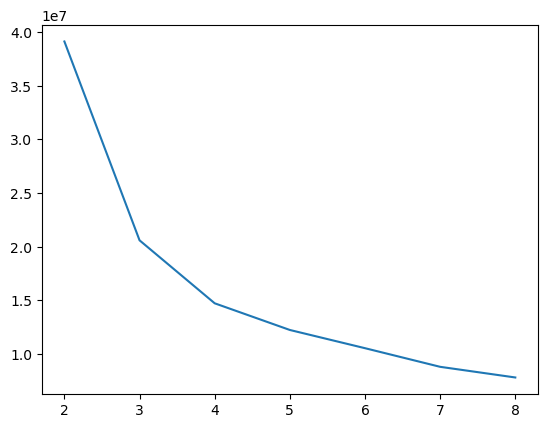

In [30]:
data_simulacion_scaled = StandardScaler().fit_transform(data_simulacion[['Edad','APACHE','EstadiaUTI','TiempoVAM','Est. PreUCI',
                                                                       'Est. PostUCI']])
ssd=[]

for k in range(2,9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(data_simulacion)
    ssd.append(kmeans_model.inertia_)
sns.lineplot(x=range(2,9), y=ssd, markers='o')

In [31]:
modelo = KMeans(n_clusters=3).fit(data_simulacion)
data_mean = modelo.predict(data_simulacion)
silhouette_score(X=data_simulacion, labels=data_mean)

c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Isael\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.6158674899534621

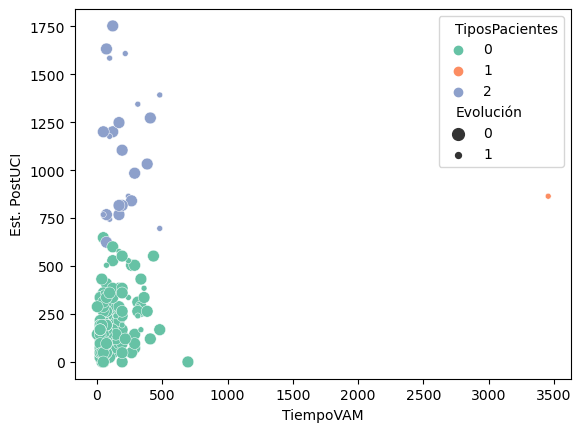

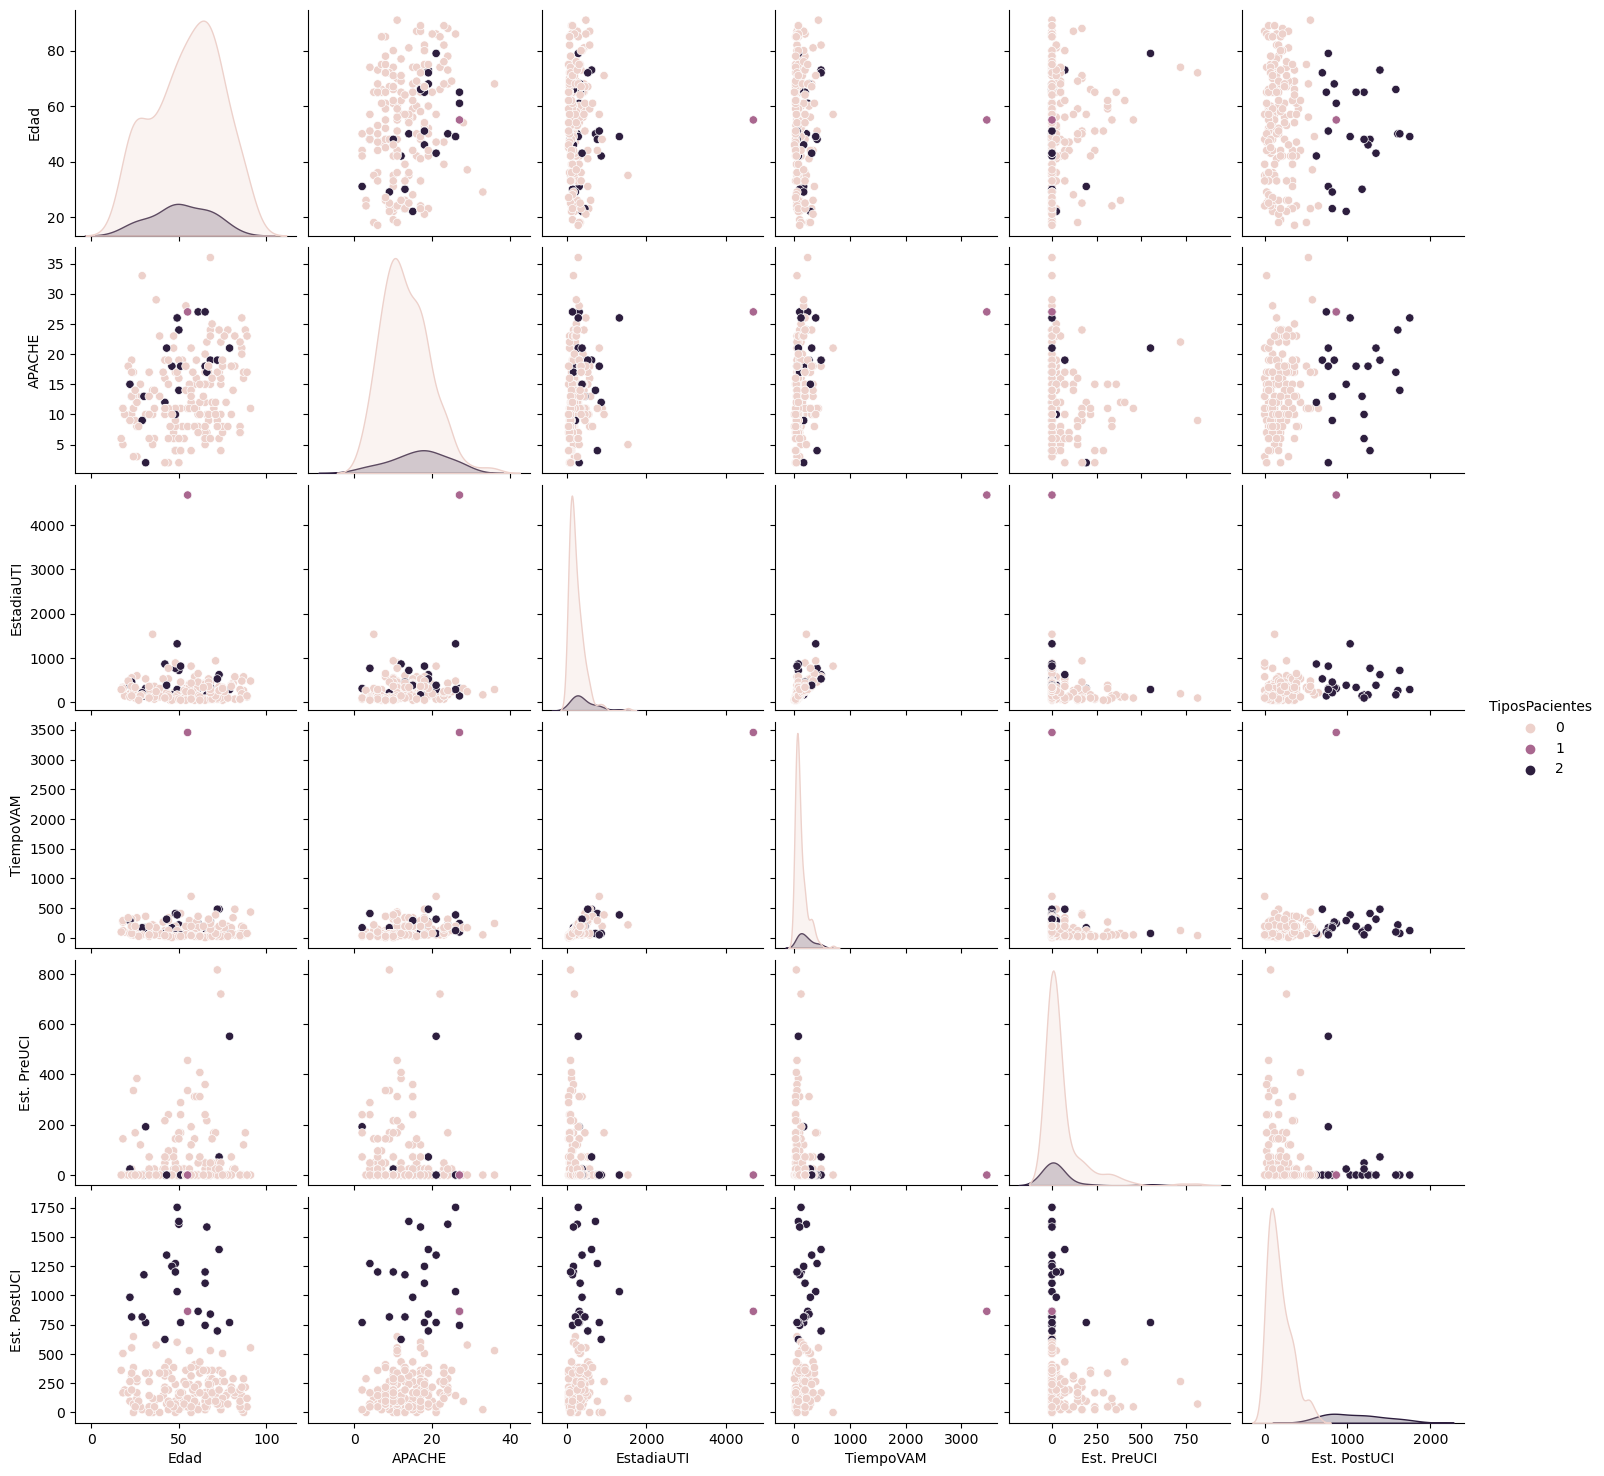

In [32]:
data_simulacion['TiposPacientes'] = data_mean
sns.scatterplot(data = data_simulacion, x = 'TiempoVAM', y = 'Est. PostUCI', hue = 'TiposPacientes', size = 'Evolución', palette="Set2");
sns.pairplot(data=data_simulacion, hue='TiposPacientes')


In [36]:
centroid = modelo.cluster_centers_
nueva_instancia = np.array([35,1,0,0,0,10,8,1,1,96,48,0])
distancias = np.sqrt(np.sum((centroid[:, :12] - nueva_instancia) ** 2, axis=1))
distancias = np.linalg.norm(nueva_instancia - centroid[:, :12])
cluster_predicho = np.argmin(distancias)
print(data_simulacion.head())
print(cluster_predicho)

   Edad Diag.Ing1 Diag.Ing2 Diag.Ing3 Diag.Ing4  APACHE InsufResp VA VAG  \
0    35         1         0         0         0      10         8  1   1   
1    87         2         0         0         0      16         8  3   2   
2    70         4         0         0         0      11         7  1   1   
3    24        13         0         0         0      11         7  1   1   
4    24         3         0         0         0      17         6  1   1   

   EstadiaUTI  TiempoVAM  Est. PreUCI Evolución  Est. PostUCI Diag.Egr1  \
0          96         48            0         0             0         1   
1         576         48            0         0             0         2   
2          72         48          168         0            96         4   
3         144         48            0         0             0        13   
4         120         72            0         0            96         3   

  Diag.Egr2 Diag.Egr3 Diag.Egr4  TiposPacientes  
0         0       0.0         0           

In [34]:
df_centroides = pd.DataFrame(centroid)
df_centroides.to_csv("DF_Centroides.csv")